# Brian tutorial: neurons

In [1]:
%matplotlib inline
from brian2 import *
prefs.codegen.target = 'numpy'  # this switches off fancy code generation for now

## Brian's unit system

All the standard SI units are available using their name (volt, siemens, meter (or metre), second, etc.), together with standard prefixes n (nano), u (micro), m (milli), k (kilo), M (mega), etc.

Because it would lead to clashes with user-defined variable names too often, single letter names are *not* defined (e.g. no `s` or `m`), but for convenience the most commonly used abbreviations for neuroscience are available (e.g. `ms` instead of `msecond`, `mV` instead of `mvolt`, `nS` instead of `nsiemens`, etc.)

Brian complains when using physical quantities incorrectly

## Neural dynamics

Membrane potential equation:
$$
C_m\frac{d V_m}{dt} = I + g_L (E_L - V_m)
$$

In [2]:
start_scope() # This tells Brian to only look at the model defined under this line (in case you have more models)

Cm = 200*pF
E_L = -70*mV
I= 1.5*nA

eqs = '''
dVm/dt = (I +g_L*(E_L - Vm))/Cm : volt
g_L : siemens
'''

group = NeuronGroup(18,eqs)
group.Vm = E_L
group.g_L = '10*nS + rand()*5*nS'


mon = StateMonitor(group, 'Vm', record=[0,5,7])
run(100*ms, report='text')



INFO       No numerical integration method specified for group 'neurongroup', using method 'exact' (took 0.30s). [brian2.stateupdaters.base.method_choice]


Starting simulation at t=0. s for a duration of 100. ms
100. ms (100%) simulated in < 1s


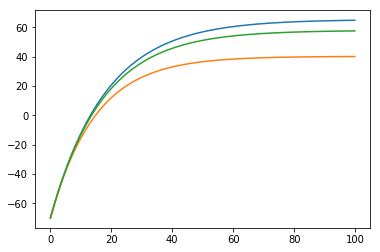

In [3]:
# plot membrane potential over time
group.Vm[5]
plt.plot(mon.t/ms,mon.Vm.T/mV)

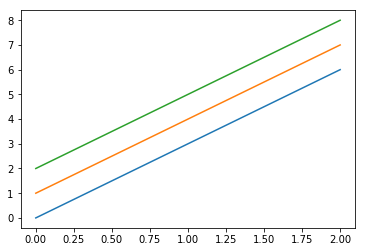

In [4]:
a = np.arange(0,9).reshape(3,3)
b = np.arange(0,3)
plt.plot(b,a)

### [Exercise: time dependent current]

Replace the injected current in the model above by a current that changes in time.

*Hints:*

* Equations can refer to all defined constants and variables, as well as to a few standard variables/constants that are predefined, e.g.:

`N` (number of neurons in the group), `i` (index of the neuron), `t` (current time), `dt` (the time step used for the simulation)
* Equations can make use of standard mathematical functions, e.g. `exp`, `sin`, `sqrt`, ...
* Equations can be made more readable by introducing "subexpressions", i.e. short names for longer terms. For example, the following two definitions do the same thing:


```Python
eqs = '''
dv/dt = 1/Cm * (I + g_L * (E_L - v)) : volt
'''
eqs = '''
dv/dt = 1/Cm * (I_inj + g_L * (E_L - v)) : volt
I_inj = 1.0 * I : amp 
'''
```

INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.02s, trying other methods took 0.01s). [brian2.stateupdaters.base.method_choice]


Starting simulation at t=0. s for a duration of 100. ms
100. ms (100%) simulated in < 1s


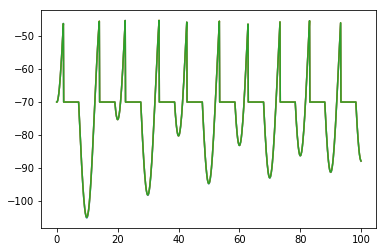

In [16]:
start_scope() # This tells Brian to only look at the model defined under this line (in case you have more models)

Cm = 200*pF
E_L = -70*mV
f= 100*Hz

eqs = '''
dVm/dt = 1/Cm * (I_inj + g_L * (E_L - Vm)) : volt (unless refractory)
g_L : siemens
I_inj = sin(2*pi*f*t)*4*nA : amp 
'''
# The unless refractory says clamp Vm and don't follow eqns during refractory period

group = NeuronGroup(18,eqs, threshold='Vm> -45*mV',reset = 'Vm = E_L',refractory=5*ms)
group.Vm = E_L
group.g_L = '10*nS + rand()*5*nS'


mon = StateMonitor(group, 'Vm', record=[0,5,7]) #monitor the membrane voltage
spike_mon = SpikeMonitor(group) # monitor the spikes
run(100*ms, report='text')


plt.plot(mon.t/ms,mon.Vm.T/mV)


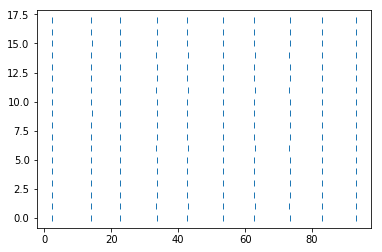

In [17]:
# Raster plot
plt.plot(spike_mon.t/ms,spike_mon.i,'|')

## Spiking neurons

Integrate-and-fire neuron models (like the model we are using here), only model the "passive" neuron, i.e. only its subthreshold state and not the generation of action potentials. Action potentials are counted whenever the membrane potential crosses a threshold and then the membrane potential is reset to a lower value.

In [ ]:
# Spiking neuron
start_scope()


In [ ]:
# Raster plot

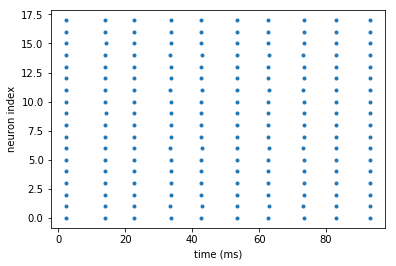

In [19]:
# The brian2tools package provides useful tools, e.g. for quick visualization:
from brian2tools import *
brian_plot(spike_mon)